<a href="https://colab.research.google.com/github/1leilahm/O_M_SIM/blob/master/leila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!git clone https://github.com/leilahm1/Track

Cloning into 'Track'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283
Receiving objects: 100% (1283/1283), 14.43 MiB | 37.88 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [72]:
!ls Track

driving_log.csv  IMG


In [73]:
!pip3 install imgaug

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Flatten,Dense
import cv2
from imgaug import augmenters as iaa
import pandas as pd
import ntpath
import random
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [75]:
datadir='Track'
columns=['center','left','right','steering','throttle','reverse','speed']
data=pd.read_csv(os.path.join(datadir,'driving_log.csv'),names=columns)
pd.set_option('display.max_colwidth',-1)
data.head()



center  ...     speed
0  C:\Users\asus\Desktop\related work\Behavioral-Cloning--SelfDrivingCar-master\IMG\center_2018_11_08_16_34_09_945.jpg  ...  0.000080
1  C:\Users\asus\Desktop\related work\Behavioral-Cloning--SelfDrivingCar-master\IMG\center_2018_11_08_16_34_10_080.jpg  ...  0.000078
2  C:\Users\asus\Desktop\related work\Behavioral-Cloning--SelfDrivingCar-master\IMG\center_2018_11_08_16_34_10_191.jpg  ...  0.000078
3  C:\Users\asus\Desktop\related work\Behavioral-Cloning--SelfDrivingCar-master\IMG\center_2018_11_08_16_34_10_295.jpg  ...  0.000079
4  C:\Users\asus\Desktop\related work\Behavioral-Cloning--SelfDrivingCar-master\IMG\center_2018_11_08_16_34_10_402.jpg  ...  0.000078

[5 rows x 7 columns]

In [76]:
def path_leaf(path):
  head,tail=ntpath.split(path)
  return tail
data['center']=data['center'].apply(path_leaf)
data['left']=data['left'].apply(path_leaf)
data['right']=data['right'].apply(path_leaf)
data.head()


center  ...     speed
0  center_2018_11_08_16_34_09_945.jpg  ...  0.000080
1  center_2018_11_08_16_34_10_080.jpg  ...  0.000078
2  center_2018_11_08_16_34_10_191.jpg  ...  0.000078
3  center_2018_11_08_16_34_10_295.jpg  ...  0.000079
4  center_2018_11_08_16_34_10_402.jpg  ...  0.000078

[5 rows x 7 columns]

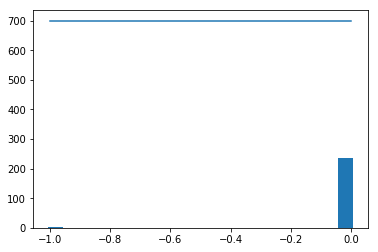

In [77]:
num_bins=25
samples_per_bin=700
hist,bins=np.histogram(data['steering'],num_bins)
center=(bins[:-1]+bins[1:])*0.5
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))

total data: 245
removed: 0
remaining: 245


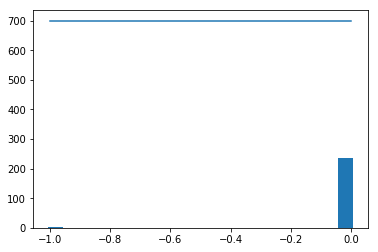

In [78]:
print('total data:',len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
 
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [79]:
print(data.iloc[1])
def load_img_steering(datadir,df):
  image_path=[]
  steering=[]
  
  for i in range(len(data)):
    indexed_data=data.iloc[i]
    center,left,right=indexed_data[0],indexed_data[1],indexed_data[3]
    image_path.append(os.path.join(datadir,center.strip()))
    steering.append(float(indexed_data[3]))
    
  image_paths=np.asarray(image_path)
  steerings=np.asarray(steering)
  return image_paths,steerings
    
image_paths,steerings=load_img_steering(datadir+'/IMG',data)

center      center_2018_11_08_16_34_10_080.jpg
left        left_2018_11_08_16_34_10_080.jpg  
right       right_2018_11_08_16_34_10_080.jpg 
steering    0                                 
throttle    0                                 
reverse     0                                 
speed       7.78579e-05                       
Name: 1, dtype: object


In [80]:
X_train,X_valid,y_train,y_valid=train_test_split(image_paths,steerings,test_size=0.2,random_state=5)
print('Training Samples : {}\nValid Samples : {}'.format(len(X_train),len(X_valid)))

Training Samples : 196
Valid Samples : 49


Text(0.5, 1.0, 'Validation set')

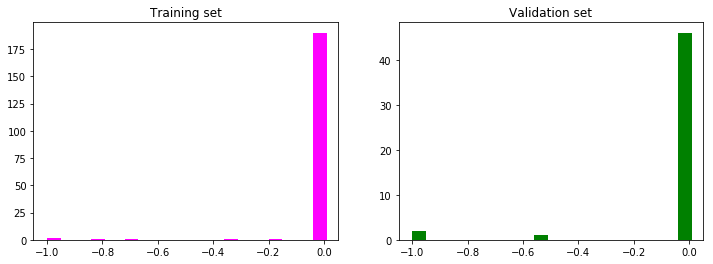

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='magenta')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='green')
axes[1].set_title('Validation set')

In [0]:
def zoom(image):
  zoom=iaa.Affine(scale=(1,1.3))
  image=zoom.augment_image(image)
  return image

Text(0.5, 1.0, 'Zoomed Image')

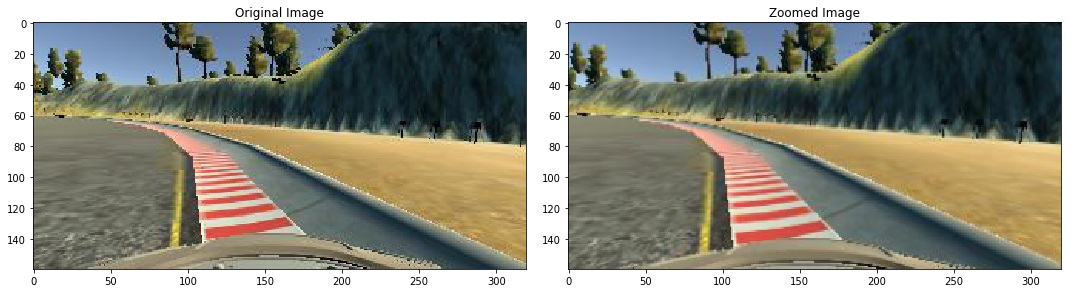

In [83]:
image=image_paths[random.randint(0,100)]
original_image=mpimg.imread(image)
zoomed_image=zoom(original_image)

fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')


In [0]:
def pan(image):
  pan = iaa.Affine(translate_percent={"x":(-0.1,0.1),"y":(-0.1,0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned image')

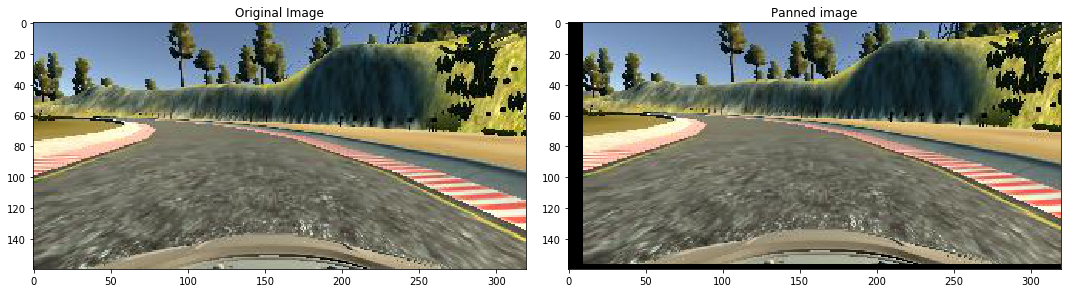

In [85]:
image=image_paths[random.randint(0,100)]
original_image=mpimg.imread(image)
panned_image=pan(original_image)

fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(panned_image)
axs[1].set_title('Panned image')

In [0]:
def img_random_brightness(image):
  brightness=iaa.Multiply((0.2,1.2))
  image=brightness.augment_image(image)
  return image

Text(0.5, 1.0, 'brightness_altered_image image')

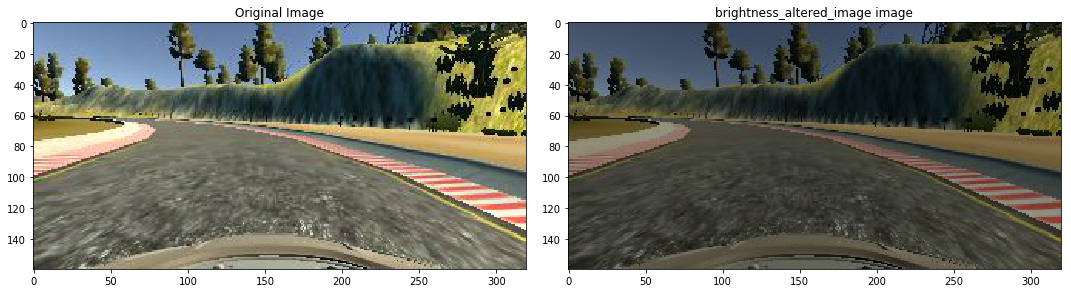

In [87]:
image=image_paths[random.randint(0,100)]
original_image=mpimg.imread(image)
brightness_altered_image=img_random_brightness(original_image)

fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(brightness_altered_image)
axs[1].set_title('brightness_altered_image image')

In [0]:
def img_random_flip(image,steering_angle):
  image = cv2.flip(image,1)
  steering_angle=-steering_angle
  return image,steering_angle

Text(0.5, 1.0, 'Flipped Image - Steering Angle:-0.0')

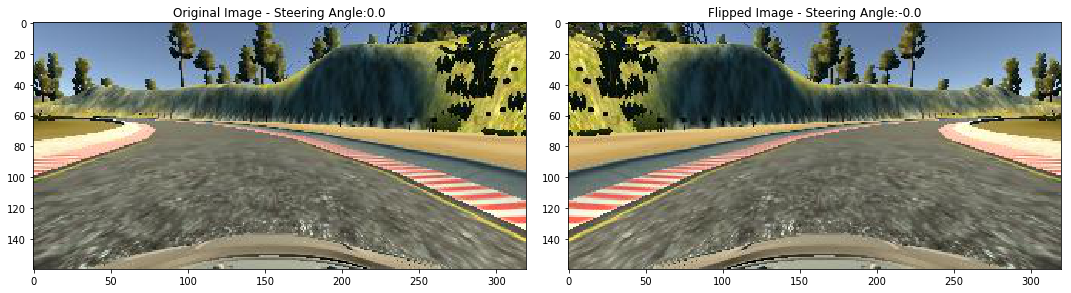

In [90]:
random_index=random.randint(0,100)
image=image_paths[random_index]
steering_angle=steerings[random_index]
original_image=mpimg.imread(image)
flipped_image,flipped_steering_angle=img_random_flip(original_image,steering_angle)
fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' +str(steering_angle))
axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' +str(flipped_steering_angle))

In [0]:
def random_augment(image,steering_angle):
  image=mpimg.imread(image)
  if np.random.rand()<0.5:
    image=pan(image)
  if np.random.rand()<0.5:
    image=zoom(image)
  if np.random.rand()<0.5:
    image=img_random_brightness(image)
  if np.random.rand()<0.5:
    image,steering_angle=img_random_flip(image,steering_angle)
  return image,steering_angle

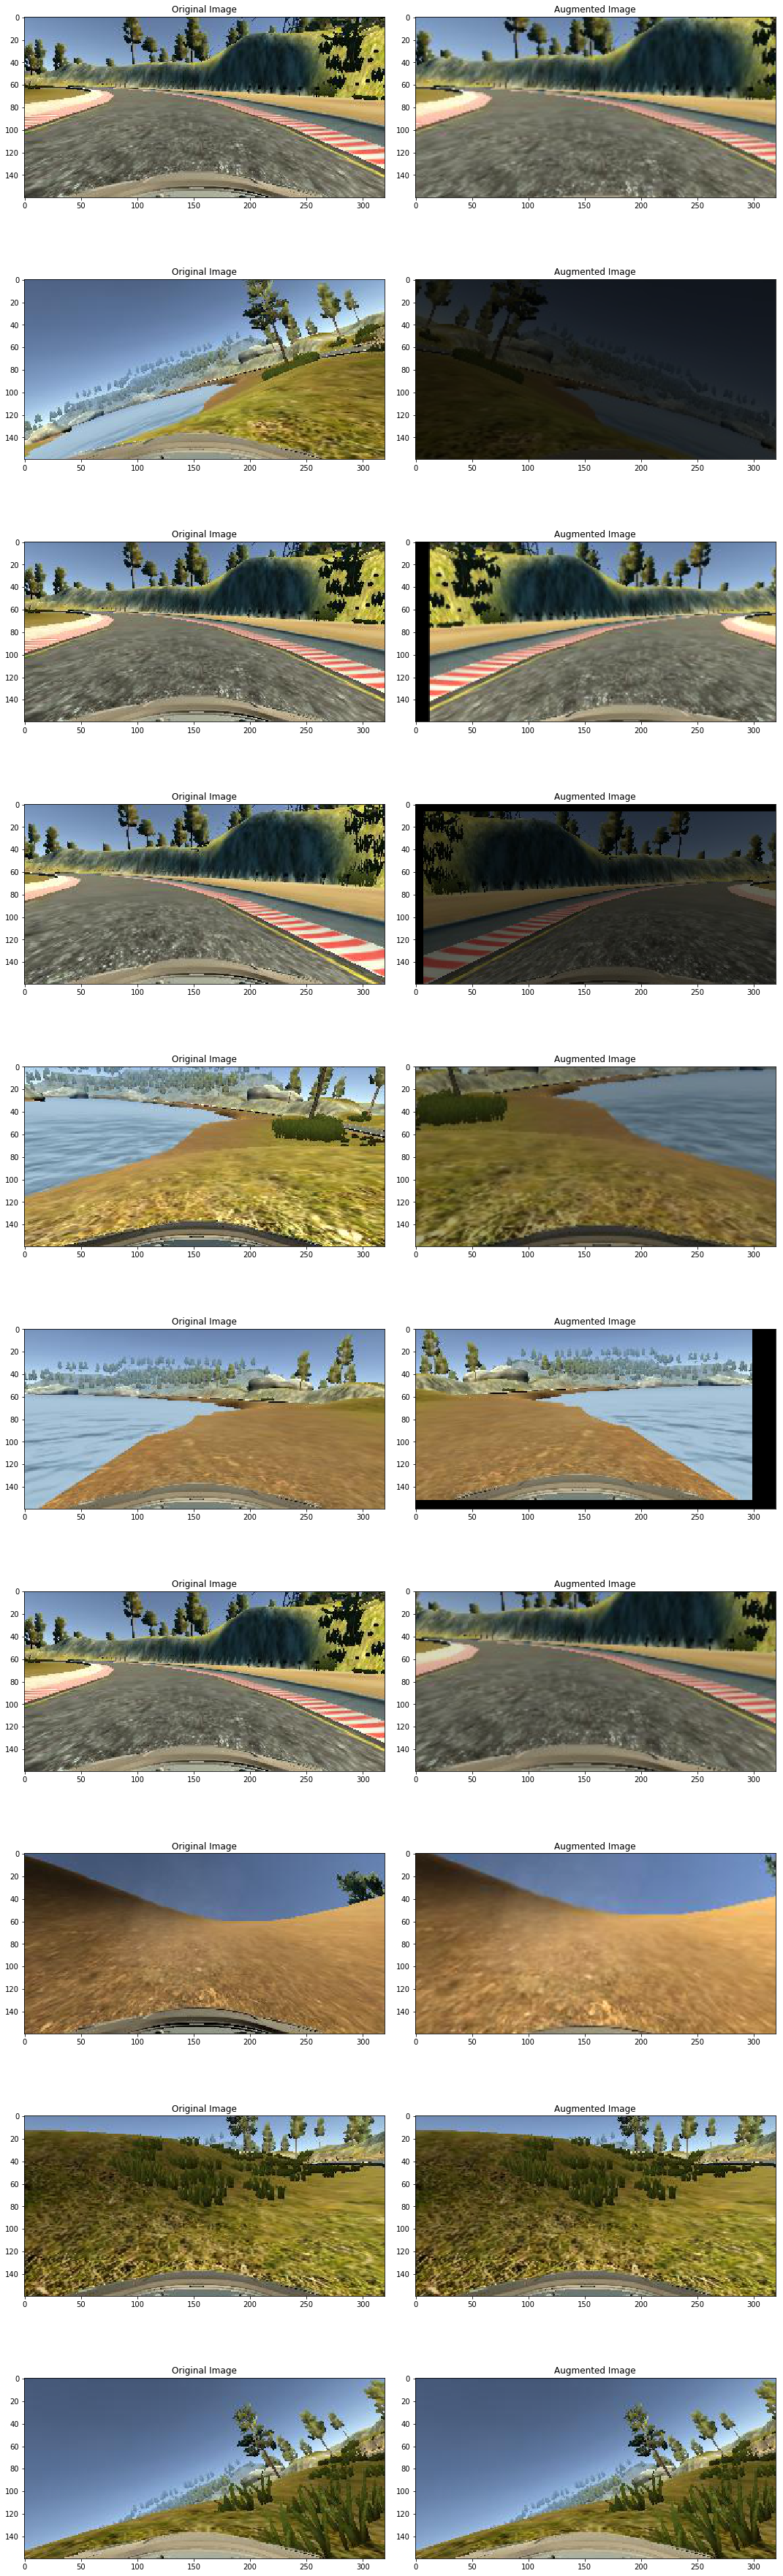

In [92]:
ncol=2
nrow=10
fig,axs=plt.subplots(nrow,ncol,figsize=(15,50))
fig.tight_layout()
for i in range(10):
  randnum=random.randint(0,len(image_paths)-1)
  random_image=image_paths[randnum]
  random_steering=steerings[randnum]
  original_image=mpimg.imread(random_image)
  augmented_image,steering=random_augment(random_image,random_steering)
  axs[i][0].imshow(original_image)
  axs[i][0].set_title('Original Image')
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title('Augmented Image')

In [0]:
def img_preprocess(img):
  img=mpimg.imread(img)
  img=img[60:140,:,:]
  img=cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img=cv2.GaussianBlur(img,(3,3),0)
  img=cv2.resize(img,(200,66))
  img=img/255
  return img

Text(0.5, 1.0, 'Preprocssed Image')

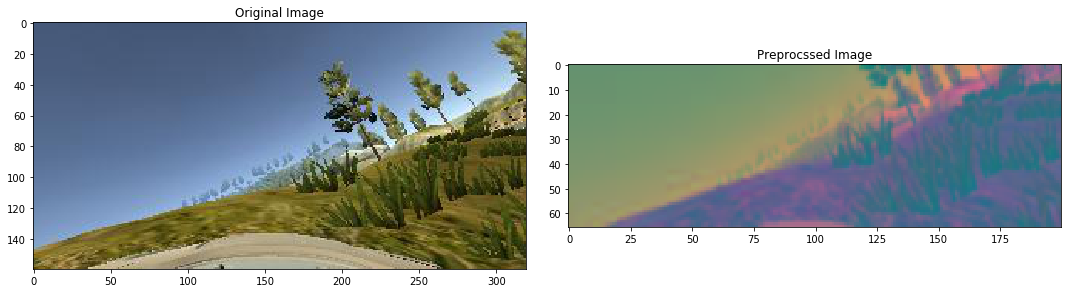

In [94]:
image = image_paths[100]
original_image=mpimg.imread(image)
preprocessed_image=img_preprocess(image)

fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocssed Image')


In [0]:
X_train=np.array(list(map(img_preprocess,X_train)))
X_valid=np.array(list(map(img_preprocess,X_valid)))

(196, 66, 200, 3)


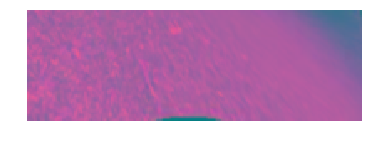

In [96]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [0]:
def first_model():
  
  model=Sequential()
  model.add(Convolution2D(32,5,5,subsample=(2,2),input_shape=(66,200,3),activation='elu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Convolution2D(64,5,5, activation='elu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(1000, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(100, activation='elu'))
  model.add(Dense(10, activation='elu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3),metrics=['accuracy'])
  return model
  

In [114]:
model=first_model()
print (model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 31, 98, 32)        2432      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 49, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 45, 64)        51264     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 22, 64)         0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 5, 22, 64)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 7040)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 1000)            

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="elu")`
  


In [115]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),batch_size=100,verbose=1,shuffle=1)

Train on 196 samples, validate on 49 samples
Epoch 1/100
196/196 [==============================] - 1s 7ms/step - loss: 97.5860 - acc: 0.3010 - val_loss: 0.0856 - val_acc: 0.9388
Epoch 2/100
196/196 [==============================] - 0s 743us/step - loss: 25.3497 - acc: 0.4286 - val_loss: 0.3059 - val_acc: 0.0408
Epoch 3/100
196/196 [==============================] - 0s 749us/step - loss: 0.5704 - acc: 0.3367 - val_loss: 0.5404 - val_acc: 0.0408
Epoch 4/100
196/196 [==============================] - 0s 708us/step - loss: 0.8720 - acc: 0.1888 - val_loss: 0.1689 - val_acc: 0.9388
Epoch 5/100
196/196 [==============================] - 0s 717us/step - loss: 0.3435 - acc: 0.6020 - val_loss: 0.1317 - val_acc: 0.9388
Epoch 6/100
196/196 [==============================] - 0s 685us/step - loss: 0.1900 - acc: 0.8265 - val_loss: 0.1246 - val_acc: 0.9388
Epoch 7/100
196/196 [==============================] - 0s 636us/step - loss: 0.1829 - acc: 0.8673 - val_loss: 0.1255 - val_acc: 0.9388
Epoch 8/10

Text(0.5, 0, 'Epoch')

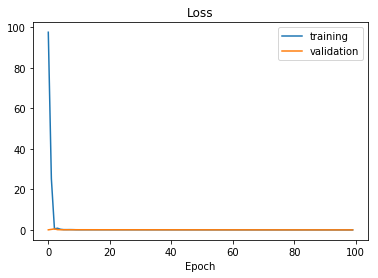

In [116]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [0]:
y_pred = model.predict(X_valid)

In [102]:
y_pred[:5]

array([[0.07944314],
       [0.07944314],
       [0.07944314],
       [0.07944314],
       [0.07944314]], dtype=float32)

In [103]:
y_valid[:5]

array([0., 0., 0., 0., 0.])

In [104]:
score = model.evaluate(X_valid, y_valid,verbose=1)

print(score)

49/49 [==============================] - 0s 578us/step
[0.061646554162915874, 0.938775511420503]


In [0]:
from google.colab import files
model.save('model.h5')
files.download('model.h5')